# ニューラルネットワークの学習

## 1.1 データから学習する

* ニューラルネットワークの特徴は「プログラムがデータから自動的に学習する」ということ。  
具体的には「プログラムはデータから重みパラメータの値を自動的に更新」して学習を実行する。

## 1.2 損失関数

### 1.2.1 プログラムは何を指標として、重みパラメータを更新しているのか?

ニューラルネットワークの学習は「損失関数」を指標として、損失関数の値が小さくなるように重みパラメータを更新する。

### 1.2.2 二乗和誤差

損失関数として、最も有名

$$
{ \displaystyle
E = \frac{1}{2} \sum_k {(y_k-t_k)}^2}
\tag{4.1} \label{4.1}
$$

* ykはニューラルネットワークの出力、tkは教師データを表し、kはデータの次元数を表す。   
* ニューラルネットワークの出力と正解となる教師データの各要素の差の2乗の総和が2乗和誤差。   
* 出力結果の教師データの誤差が小さい場合，より小さい値を出力する。

In [5]:
import numpy as np

"""
二乗和誤差を実装
"""
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [6]:
# 正解を2とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# パターン1：「2」の割合が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
# パターン2：「7」の割合が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.5975

パターン1の方がパターン2よりも二乗和誤差関数を実装した結果が小さい。  
つまり、パターン1の方が出力結果が教師データにより適合していることを二乗和誤差関数が示している。

### 1.2.3 交差エントロピー誤差

$$
{ \displaystyle
E = - \sum_k t_k \log y_k}
\tag{4.2} \label{4.2}
$$

tkは2乗和誤差と同様教師データであり、one-hot表現であるため、   
(4.2)は実質的には正解ラベルが1に対応する出力の自然対数を計算するだけになっている。   
ここで、自然対数のグラフは次のようになっている。   

In [9]:
"""
交差エントロピー誤差を実装
"""
def cross_entropy_error(y, t):
     delta = 1e-7    #np.log(0)防止
     return -np.sum(t * np.log(y + delta))

In [10]:
# 正解を2とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# パターン1：「2」の割合が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
# パターン2：「7」の割合が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

正解ラベルに対応する出力の値が大きいほど、交差エントロピー誤差は0に近づいている。

### 1.2.4 ミニバッチ学習

* 機械学習の問題は、訓練データを使って学習を行う。   
具体的には訓練データに対する損失関数を求め、その値を出来るだけ小さくするようなパラメータを探索するということである。

* 損失関数はすべての訓練データを対象として求める必要がある。(訓練データが100個あれば、100個の損失関数の和を求めて、指標とする)

* ビックデータの全てに対して、損失関数を求めるのは現実的ではないので、データの中から一部をランダムに選び出す。   
これをミニバッチという。そのミニバッチごとに学習を行うのが現実的であり、これをミニバッチ学習と言う。

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

#MNISTデータの読み込み
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [19]:
#訓練データからランダムに10枚抜き出す
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [20]:
"""
バッチ対応版 交差エントロピー誤差の実装
"""
def cross_entropy_error(y ,t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.sahpe[0]
    return -np.sum(t * np.log(y)) / batch_size

## 1.3 数値微分

* ニューラルネットワークの学習では、最適なパラメータ(重みとバイアス)を探索する際に、   
損失関数の値が出来るだけ小さくなるようにパラメータを探索する。   

* 出来るだけ小さな損失関数の値を探すため、パラメータの微分(正確には勾配)を計算している。

* 計算された微分の値を手がかりにパラメータの値を徐々に更新している。

### 1.3.1 微分

(編集中)

## 1.4 勾配

(編集中)

## 1.5 学習アルゴリズムの実装

### 1.5.1 ニューラルネットワークの学習手順

1. ステップ1 : 「ミニバッチ」

訓練データの中からランダムに一部のデータを選び出す。その選ばれたデータをミニバッチと呼ぶ。   
ここでは、そのミニバッチの損失関数を減らすことを目的とする。

2. ステップ2 : 「勾配の算出」

ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。  
勾配は、損失関数の値を最も減らす方向を示す。

3. ステップ3 : 「パラメータの更新」

重みパラメータを勾配方向に微小量だけ更新する。

4. ステップ4 : 「繰り返す」

ステップ1～ステップ3までを繰り返す。

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7856, 0.7894
train acc, test acc | 0.8756833333333334, 0.8798
train acc, test acc | 0.8988333333333334, 0.9026
train acc, test acc | 0.9087833333333334, 0.9119
train acc, test acc | 0.91505, 0.9171
train acc, test acc | 0.9183166666666667, 0.9213
train acc, test acc | 0.9231666666666667, 0.9243
train acc, test acc | 0.9263666666666667, 0.9269
train acc, test acc | 0.9301166666666667, 0.9307
train acc, test acc | 0.933, 0.9328
train acc, test acc | 0.9357166666666666, 0.9361
train acc, test acc | 0.9386166666666667, 0.9383
train acc, test acc | 0.9402833333333334, 0.9399
train acc, test acc | 0.9430833333333334, 0.9421
train acc, test acc | 0.9452333333333334, 0.9446
train acc, test acc | 0.9460833333333334, 0.9451


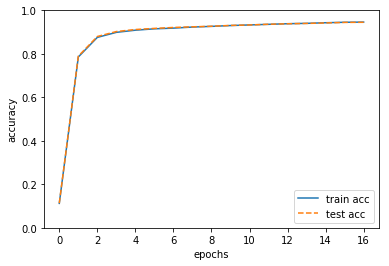

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

%matplotlib inline

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 1.6 まとめ

* 機械学習で使用するデータセットは訓練データとテキストデータに分けて使用する。    

* 訓練データで学習を行い、学習したモデルの汎化能力をテストデータで評価する。    

* ニューラルネットワークの学習は損失関数を指標として、損失関数の値が小さくなるように重みパラメータを更新する。  

* 重みパラメータを更新する際には、重みパラメータの勾配を利用して、勾配方向に重みの値を更新する作業を繰り返す。  

* 微小な値を与えたときの差分によって微分を求めることを数値微分という。  

* 数値微分によって、重みパラメータの勾配を求めることが出来る。  

* 数値微分による計算には時間がかかるが、その実装は簡単である。   
  一方、次章で実装するやや複雑な誤差逆伝播法は、高速に勾配を求めることが出来る。